In [21]:
# https://molecularneurodegeneration.biomedcentral.com/articles/10.1186/s13024-022-00589-x#Sec28
# code: https://github.com/denalitherapeutics/Lengerich_natneuro_2022/blob/main/transcriptomics/4_Combined_analysis.Rmd

In [25]:
# cluster 0 and 1 are homeostatic 

In [48]:
import scanpy as sc
import os
import glob
import numpy as np

## GSE200275

In [43]:
gse200275 = sc.read_h5ad("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/mouse_trem2/GSE200275_integrated.h5ad")

In [44]:
gse200275

AnnData object with n_obs × n_vars = 102043 × 32372
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'X', 'sample_id', 'sample_name', 'parent_id', 'subject_id', 'description', 'species', 'sex', 'sample_source', 'sample_type', 'organ', 'region', 'cell_type', 'strain', 'age', 'age_unit', 'batch', 'genotype', 'treatment', 'treatment_dose', 'treatment_dose_unit', 'treatment_duration', 'treatment_duration_unit', 'takedown_date', 'percent.mito', 'integrated_snn_res.0.1', 'seurat_clusters'
    var: 'features'

In [30]:
gse200275.obs

,orig.ident,nCount_RNA,nFeature_RNA,X,sample_id,sample_name,parent_id,subject_id,description,species,...,genotype,treatment,treatment_dose,treatment_dose_unit,treatment_duration,treatment_duration_unit,takedown_date,percent.mito,integrated_snn_res.0.1,seurat_clusters
AAACCCAAGAGCATTA-1_2_1,atv_trem2_timecourse,5075.0,2028,AAACCCAAGAGCATTA-1_2_1,NH35G,NH35G-Microglia,NH35G,Denali,ATV:4D9-7-Day,Mus musculus,...,hTfR KI,ATV:4D9,10,mg/kg,7,days,44028,1.852217,0,0
AAACCCAAGAGTTGAT-1_2_1,atv_trem2_timecourse,5313.0,2321,AAACCCAAGAGTTGAT-1_2_1,NH35G,NH35G-Microglia,NH35G,Denali,ATV:4D9-7-Day,Mus musculus,...,hTfR KI,ATV:4D9,10,mg/kg,7,days,44028,2.051572,0,0
AAACCCAAGTATGAAC-1_2_1,atv_trem2_timecourse,5296.0,1990,AAACCCAAGTATGAAC-1_2_1,NH35G,NH35G-Microglia,NH35G,Denali,ATV:4D9-7-Day,Mus musculus,...,hTfR KI,ATV:4D9,10,mg/kg,7,days,44028,3.946375,1,1
AAACCCACACGTATAC-1_2_1,atv_trem2_timecourse,9223.0,2852,AAACCCACACGTATAC-1_2_1,NH35G,NH35G-Microglia,NH35G,Denali,ATV:4D9-7-Day,Mus musculus,...,hTfR KI,ATV:4D9,10,mg/kg,7,days,44028,5.334490,0,0
AAACCCAGTTAGGCCC-1_2_1,atv_trem2_timecourse,4396.0,1919,AAACCCAGTTAGGCCC-1_2_1,NH35G,NH35G-Microglia,NH35G,Denali,ATV:4D9-7-Day,Mus musculus,...,hTfR KI,ATV:4D9,10,mg/kg,7,days,44028,3.662420,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTACGCTTA-1_5_3,atv_trem2_timecourse,3329.0,1721,TTTGTTGGTACGCTTA-1_5_3,NH01G,NH1G-Microglia,NH1G,Denali,ATV:4D9-28-Day,Mus musculus,...,hTfR KI,ATV:4D9,10,mg/kg,28,days,44025,1.772304,1,1
TTTGTTGGTAGATGTA-1_5_3,atv_trem2_timecourse,1410.0,713,TTTGTTGGTAGATGTA-1_5_3,NH01G,NH1G-Microglia,NH1G,Denali,ATV:4D9-28-Day,Mus musculus,...,hTfR KI,ATV:4D9,10,mg/kg,28,days,44025,9.574468,1,1
TTTGTTGGTATTCCTT-1_5_3,atv_trem2_timecourse,7511.0,2554,TTTGTTGGTATTCCTT-1_5_3,NH01G,NH1G-Microglia,NH1G,Denali,ATV:4D9-28-Day,Mus musculus,...,hTfR KI,ATV:4D9,10,mg/kg,28,days,44025,2.968979,0,0
TTTGTTGGTTTAAGGA-1_5_3,atv_trem2_timecourse,20671.0,5012,TTTGTTGGTTTAAGGA-1_5_3,NH01G,NH1G-Microglia,NH1G,Denali,ATV:4D9-28-Day,Mus musculus,...,hTfR KI,ATV:4D9,10,mg/kg,28,days,44025,3.173528,1,1


In [29]:
gse200275.obs['integrated_snn_res.0.1'].value_counts()

integrated_snn_res.0.1
0    48348
1    33853
2    19842
Name: count, dtype: int64

In [39]:
gse200275.obs['description'].value_counts()

description
ATV:4D9-28-Day    21697
ATV:4D9-1-Day     20459
ATV:RSV-1-Day     20301
ATV:4D9-14-Day    20297
ATV:4D9-7-Day     19289
Name: count, dtype: int64

In [40]:
sc.pp.normalize_total(gse200275)
sc.pp.log1p(gse200275)
sc.pp.highly_variable_genes(gse200275, n_top_genes=2000, subset = True)

sc.pp.pca(gse200275)
sc.pp.neighbors(gse200275)
sc.tl.umap(gse200275)

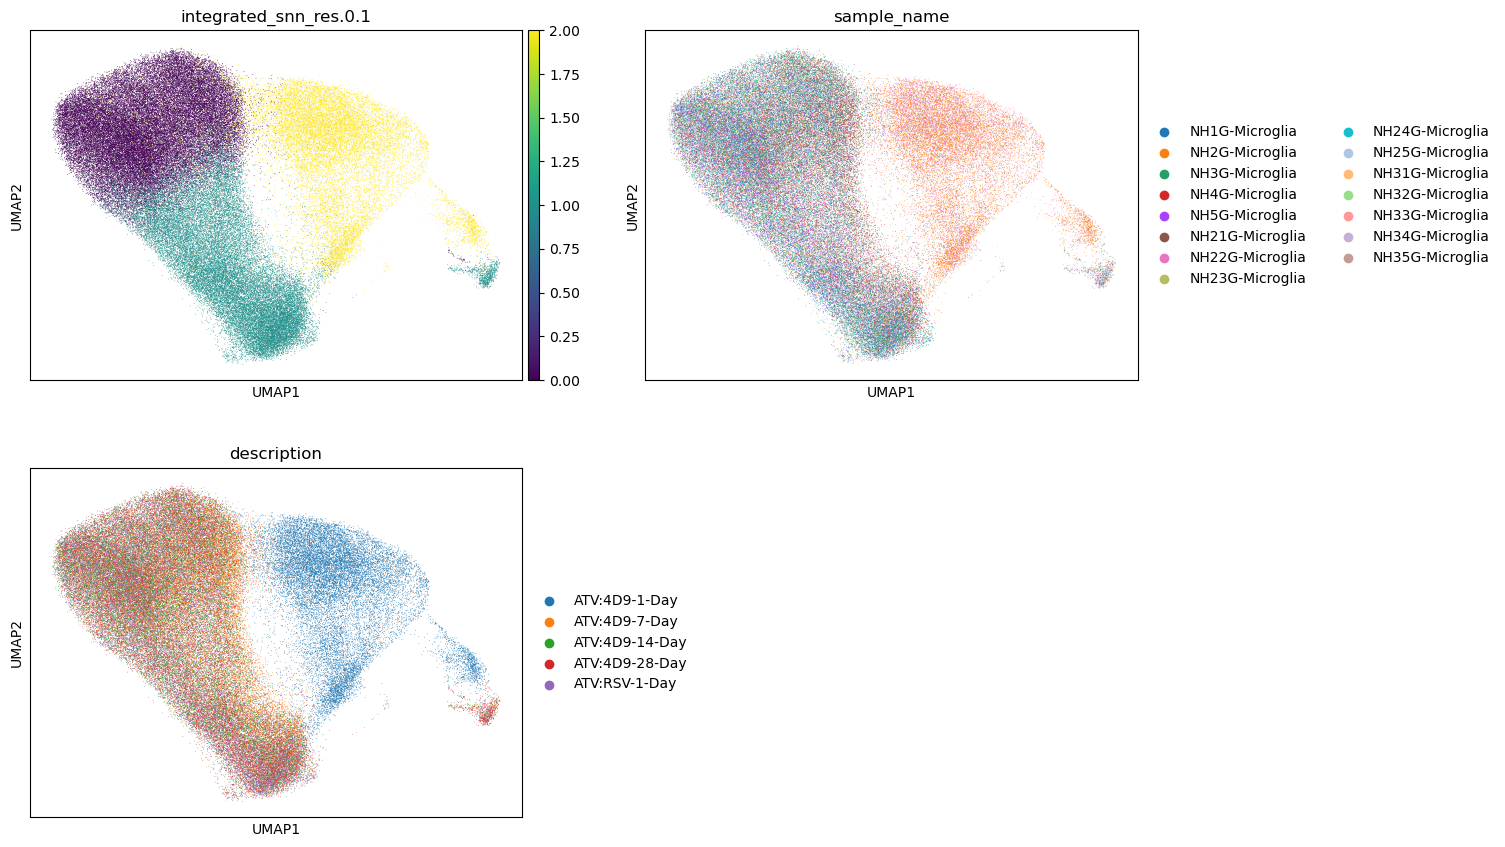

In [42]:
sc.pl.umap(gse200275, color = ['integrated_snn_res.0.1', 'sample_name', 'description'], ncols = 2)

## GSE209912

In [45]:
adata = sc.read_h5ad("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/mouse_trem2/GSE209912_integrated.h5ad")

In [46]:
adata

AnnData object with n_obs × n_vars = 74758 × 19737
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'X', 'sample', 'batch', 'genotype', 'group', 'dosing_solution_code', 'time_point', 'antibody_dose', 'sex', 'treatment', 'cohort', 'percent.mito', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.4'
    var: 'features'
    obsm: 'X_harmony', 'X_pca'
    varm: 'PCs'

In [49]:
adata.obs['paper_cluster'] = np.where(adata.obs['integrated_snn_res.0.2'].isin([0, 1]), 'homeostatic', adata.obs['integrated_snn_res.0.2'])

In [57]:
adata.raw = None

In [58]:
adata.write_h5ad("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/mouse_trem2/GSE209912_integrated.h5ad")

In [59]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset = True)

In [60]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

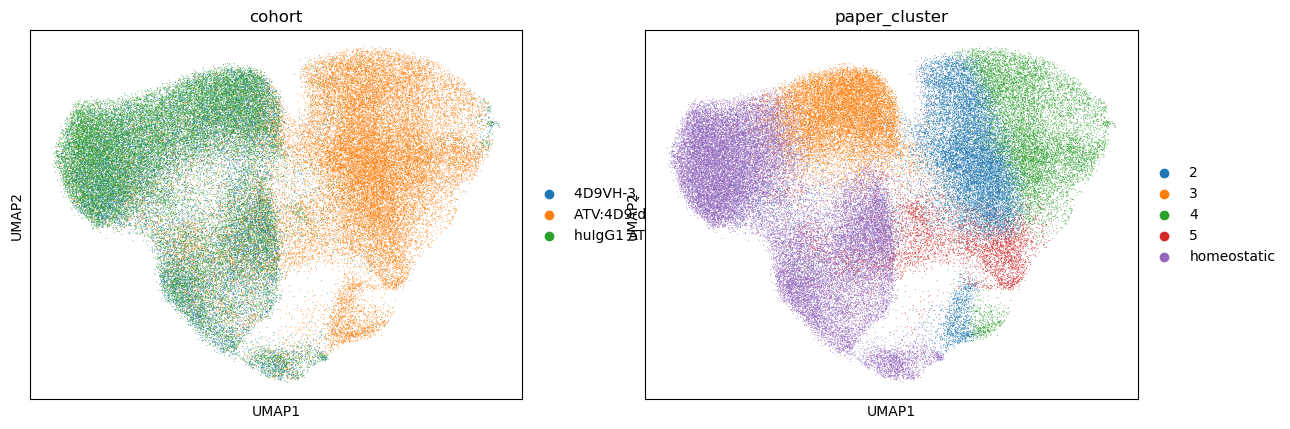

In [61]:
sc.pl.umap(adata, color = ['cohort', 'paper_cluster'], ncols = 2)

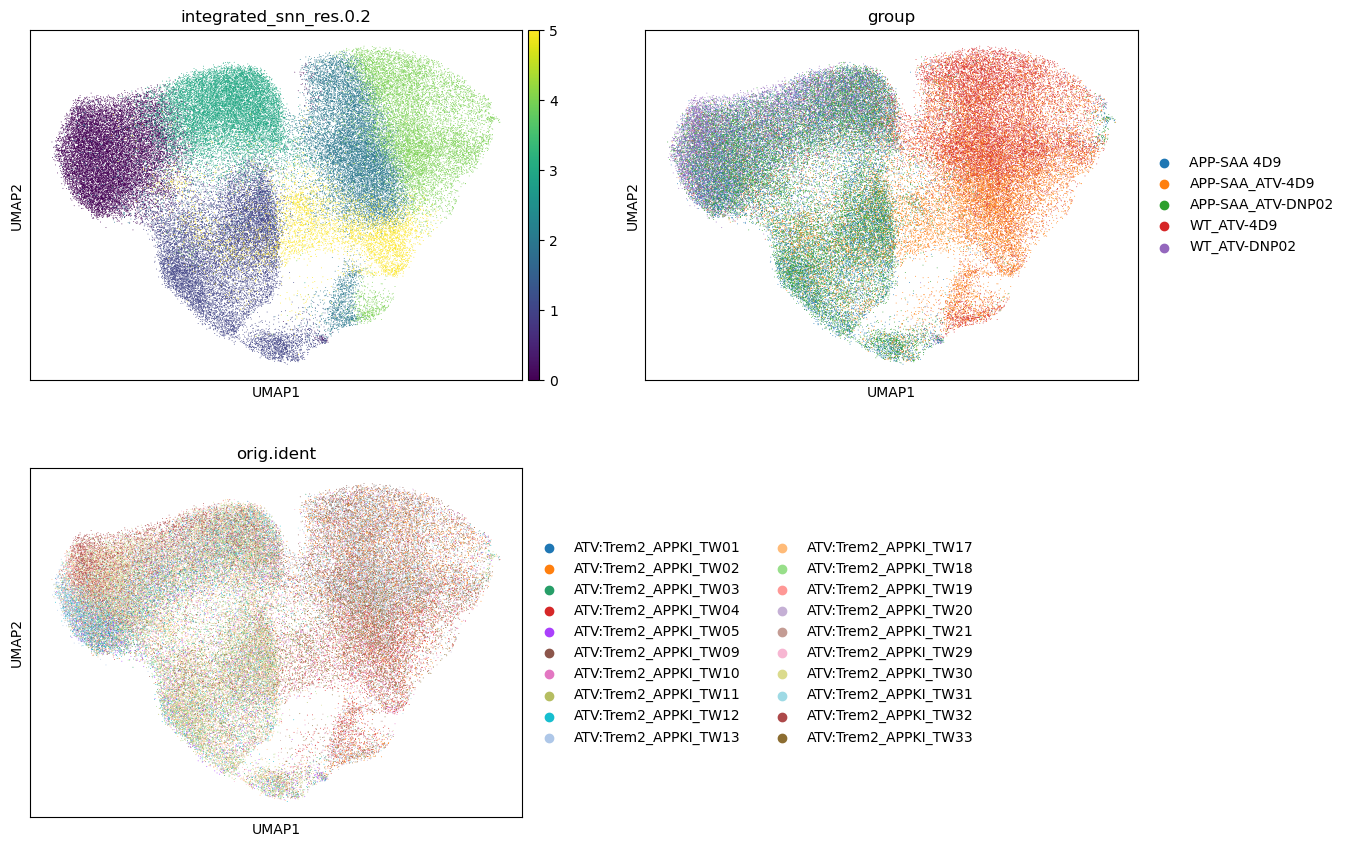

In [23]:
sc.pl.umap(adata, color = ['integrated_snn_res.0.2', 'group', 'orig.ident'], ncols = 2)

In [18]:
adata.obs['integrated_snn_res.0.2'].value_counts()

integrated_snn_res.0.2
0    16866
1    14963
2    14445
3    12993
4    10502
5     4989
Name: count, dtype: int64

In [13]:
adata.obs['seurat_clusters'].value_counts()

seurat_clusters
0    16671
1    12940
2    12176
3    10840
4     8129
5     5398
6     3126
7     2990
8     2488
Name: count, dtype: int64

In [5]:
adata.obs.group.value_counts()

group
APP-SAA_ATV-DNP02    18873
APP-SAA_ATV-4D9      16458
WT_ATV-4D9           15942
APP-SAA 4D9          13629
WT_ATV-DNP02          9856
Name: count, dtype: int64

In [7]:
adata.obs['orig.ident'].value_counts()

orig.ident
ATV:Trem2_APPKI_TW17    6126
ATV:Trem2_APPKI_TW33    5676
ATV:Trem2_APPKI_TW30    5471
ATV:Trem2_APPKI_TW04    4536
ATV:Trem2_APPKI_TW02    4512
ATV:Trem2_APPKI_TW09    4232
ATV:Trem2_APPKI_TW31    4227
ATV:Trem2_APPKI_TW18    4099
ATV:Trem2_APPKI_TW10    3833
ATV:Trem2_APPKI_TW11    3810
ATV:Trem2_APPKI_TW12    3517
ATV:Trem2_APPKI_TW03    3466
ATV:Trem2_APPKI_TW29    3266
ATV:Trem2_APPKI_TW32    2988
ATV:Trem2_APPKI_TW20    2971
ATV:Trem2_APPKI_TW05    2747
ATV:Trem2_APPKI_TW13    2465
ATV:Trem2_APPKI_TW21    2413
ATV:Trem2_APPKI_TW19    2210
ATV:Trem2_APPKI_TW01    2193
Name: count, dtype: int64